In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/CIS_5810_Project_7_Linear_Regression_Student_File_V2

/content/drive/MyDrive/CIS_5810_Project_7_Linear_Regression_Student_File_V2


In [ ]:
import numpy as np
import os
from prepare_data_sgd import *

## Loading Data

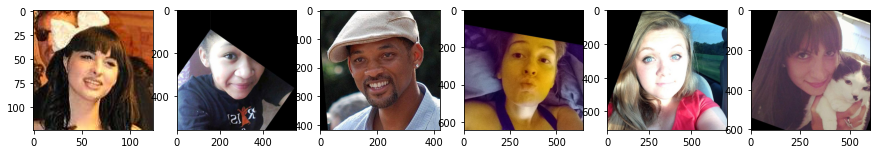

In [ ]:
base_dir = 'DATASET/'

age_train, features_train = prepare_data('train', base_dir)
age_val, features_val = prepare_data('val', base_dir)
_, features_test = prepare_data('test', base_dir)
show_data(base_dir)

## Implement Closed Form Solution
```
Arguments:
    age          -- numpy array, shape (n, )
    features     -- numpy array, shape (n, 2048)
Returns:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [ ]:
def closed_form_solution(age, features):
    # Preprocess
    H = features
    ones = np.ones(len(H))
    H = np.column_stack((ones,H))
    Y = age
    
    # Define parameter weights
    
    ##########################################################################
    # TODO: YOUR CODE HERE
    ########################################################################## 
    # calculate the closed form solution
    weights = np.linalg.inv(H.T@H)@H.T@Y
    

    # separate the weights and bias
    bias = weights[0]
    weights = weights[1:]
    
    return weights, bias

### Validate

Your validate loss is: 67.84


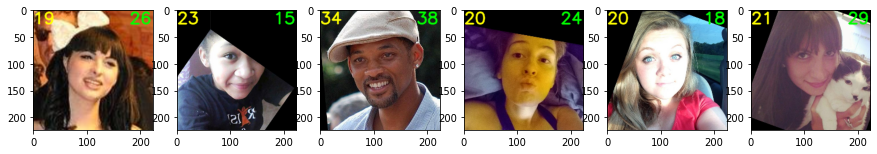

In [ ]:
w, b = closed_form_solution(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate loss is:", round(loss, 3))

### Test and Generate results file

In [ ]:
prediction = test(w, b, features_test, 'cfs.txt')
print("Test results has saved to cfs.txt")
print(prediction[:10])

Test results has saved to cfs.txt
[[28.04639962]
 [60.90374508]
 [55.19594938]
 [23.35683533]
 [35.20122167]
 [34.36335499]
 [36.63257246]
 [44.11504383]
 [18.49147786]
 [57.60077161]]


## Implement Gradient descent
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [ ]:
def gradient_descent(age, feature):
    assert len(age) == len(feature)

    # Init weights and bias
    weights = np.random.randn(feature.shape[1], 1)
    bias = np.random.randn(1, 1)
    age=age[:, np.newaxis]
    
    # Learning rate
    lr = 10e-3
    # momentum=0.9
    
    for e in range(epoch):
        ##########################################################################
        # TODO: YOUR CODE HERE
        ########################################################################## 
        # forward pass

        N=feature.shape[0]
        preds=(feature@weights)+bias
        


        # calculate loss
        loss = np.sum(np.square(age-preds))/N

        

        # calculate gradient 
        delta_w=(-2)*(feature.T@(age-preds))


        #if momentum:
          #vw=(momentum*vw)+((1-momentum)*delta_w)#pass # You can also consider the gradient descent with momentum
         # weights+=vw
        #else:
        
        
        # update weights
        weights=weights-((lr*delta_w)/N)
        bias=bias-((lr*(np.sum(age-preds))/N)*(-2))
        

        

        

        # Print epoch loss to observe the performance change (Remember to comment the print statement when submitting to Gradescope!)
        print('=> epoch:', e + 1, '  Loss:', round(loss,4))    
    return weights, bias

### Train and validate

=> epoch: 1   Loss: 1059.9153
=> epoch: 2   Loss: 552.0292
=> epoch: 3   Loss: 383.8031
=> epoch: 4   Loss: 284.6733
=> epoch: 5   Loss: 216.5626
=> epoch: 6   Loss: 168.4528
=> epoch: 7   Loss: 134.2791
=> epoch: 8   Loss: 109.9459
=> epoch: 9   Loss: 92.5791
=> epoch: 10   Loss: 80.1483
=> epoch: 11   Loss: 71.2174
=> epoch: 12   Loss: 64.7701
=> epoch: 13   Loss: 60.087
=> epoch: 14   Loss: 56.6585
=> epoch: 15   Loss: 54.1237
=> epoch: 16   Loss: 52.2265
=> epoch: 17   Loss: 50.7856
=> epoch: 18   Loss: 49.6721
=> epoch: 19   Loss: 48.7944
=> epoch: 20   Loss: 48.0874
=> epoch: 21   Loss: 47.5046
=> epoch: 22   Loss: 47.0131
=> epoch: 23   Loss: 46.5892
=> epoch: 24   Loss: 46.2158
=> epoch: 25   Loss: 45.8808
=> epoch: 26   Loss: 45.5753
=> epoch: 27   Loss: 45.293
=> epoch: 28   Loss: 45.0292
=> epoch: 29   Loss: 44.7803
=> epoch: 30   Loss: 44.5439
=> epoch: 31   Loss: 44.3181
=> epoch: 32   Loss: 44.1013
=> epoch: 33   Loss: 43.8925
=> epoch: 34   Loss: 43.6907
=> epoch: 35   L

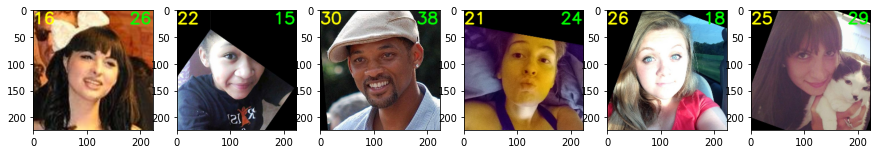

In [ ]:
w, b = gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))


# age_train=age_train[:, np.newaxis]
# features_train.shape
# age_train.shape
# weights = np.random.randn(features_train.shape[1], 1)
# weights.shape
# features_train@weights+1


###  Test and Generate results file

In [ ]:
prediction = test(w, b, features_test, 'gd.txt')
print("Test results has saved to gd.txt")
print(prediction[:10])

Test results has saved to gd.txt
[[27.84298794]
 [74.43793643]
 [49.76390005]
 [22.64380861]
 [33.92392702]
 [31.52034499]
 [34.34420062]
 [42.50741137]
 [21.27558439]
 [53.77976841]]


## Implement Stochastic Gradient descent
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.
```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [ ]:
def stochastic_gradient_descent(age, feature):
    # check the inputs
    assert len(age) == len(feature)
    
    # Set the random seed
    np.random.seed(0)

    # Init weights and bias
    weights = np.random.randn(feature.shape[1], 1)
    bias = np.random.rand(1, 1)

    # Learning rate
    lr = 10e-5

    # Batch size
    batch_size = 16
 
    # Number of mini-batches
    t = len(age) // batch_size

    for e in range(epoch_sgd):
        # Shuffle training data
        n = np.random.permutation(len(feature))  
        
        for m in range(t):
            # Providing mini batch with fixed batch size of 16
            batch_feature = feature[n[m * batch_size : (m+1) * batch_size]]
            batch_age = age[n[m * batch_size : (m+1) * batch_size]]
            
            ##########################################################################
            # TODO: YOUR CODE HERE
            ########################################################################## 
            # forward pass

            batch_age=batch_age[:,np.newaxis]
            preds=(batch_feature@weights)+bias
            N=batch_feature.shape[0]



            # calculate loss
            loss=np.sum(np.square(batch_age-preds))/N


            # calculate gradient 
            delta_w=-2*(batch_feature.T@(batch_age-preds))



            # update weights
            weights=weights-((lr*delta_w)/N)
            bias=bias-((lr*(np.sum(batch_age-preds))/N)*(-2))
   
                
            if momentum:
                pass # You can also consider the gradient descent with momentum
        
        # Print epoch loss to observe the performance change (Remember to comment the print statement when submitting to Gradescope!)
        print('=> epoch:', e + 1, '  Loss:', round(loss,4))
        # if loss<10:
        #   break
    return weights, bias

### Train and validate

=> epoch: 1   Loss: 76.3632
=> epoch: 2   Loss: 104.2666
=> epoch: 3   Loss: 81.7261
=> epoch: 4   Loss: 26.9966
=> epoch: 5   Loss: 42.6865
=> epoch: 6   Loss: 39.5361
=> epoch: 7   Loss: 47.5734
=> epoch: 8   Loss: 22.6482
=> epoch: 9   Loss: 31.2322
=> epoch: 10   Loss: 60.3226
=> epoch: 11   Loss: 25.3878
=> epoch: 12   Loss: 24.1277
=> epoch: 13   Loss: 32.0994
=> epoch: 14   Loss: 57.7286
=> epoch: 15   Loss: 22.6222
=> epoch: 16   Loss: 17.3378
=> epoch: 17   Loss: 17.0039
=> epoch: 18   Loss: 37.7122
=> epoch: 19   Loss: 16.5831
=> epoch: 20   Loss: 24.5685
=> epoch: 21   Loss: 44.3852
=> epoch: 22   Loss: 43.6378
=> epoch: 23   Loss: 17.4608
=> epoch: 24   Loss: 45.1425
=> epoch: 25   Loss: 43.6227
=> epoch: 26   Loss: 94.9247
=> epoch: 27   Loss: 19.0014
=> epoch: 28   Loss: 30.8853
=> epoch: 29   Loss: 85.3172
=> epoch: 30   Loss: 45.1852
=> epoch: 31   Loss: 39.2991
=> epoch: 32   Loss: 26.5472
=> epoch: 33   Loss: 46.3681
=> epoch: 34   Loss: 37.4322
=> epoch: 35   Loss: 8

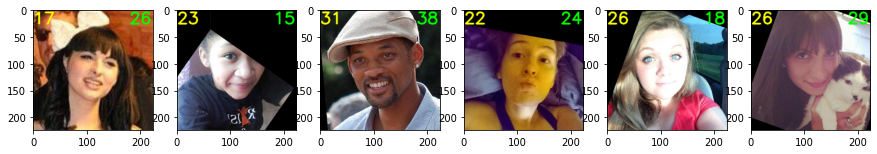

In [ ]:
w, b = stochastic_gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

### Test and Generate results file

In [ ]:
prediction = test(w, b, features_test, 'sgd.txt')
print("Test results has saved to sgd.txt")
print(prediction[:10])

Test results has saved to sgd.txt
[[27.06471482]
 [73.32800254]
 [47.76754185]
 [22.16642132]
 [34.65889707]
 [32.91152351]
 [35.14196444]
 [42.05777603]
 [22.13014917]
 [55.17913517]]


## Reflection

Now that you implemented the three methods, which method performed the best and why do you think so? How do you think you can improve your age estimation model to give better results?

(Please include your answers in the cell below)

***Answer:***

Validation score for closed form solution was 67.84.

Validation score for gradient descent solution was 60.043.

Validation score for stochastic gradient descent solution was 57.3.

A linear model is a very simple yet powerful approach which is still in use today. However, there are so many instances where there would not be any closed form solutions. When the number of features is so large, it can get expensive to compute the solution.

Gradient descent is a computationally cheaper solution which minimizes the cost function by iteratively moving towards the minima. However, we update the weights by considering the cost of all the data points in a single iteration which is not really fast when handling a large number of instances.

SGD works best because it iteratively reaches the minima by considering one or a small subset of the data points and we can get to the minima in a faster way.
However, the accuracy should actually be lower than the one obtained from gradient descent.

I have experimented and noticed that one of the ways we can improve the age estimation model is by decreasing the batch size of SGD a bit more.

## Submission

Please submit this notebook file along with three generated text file (`cfs.txt`, `gd.txt` and `sgd.txt`) to Gradescope for submission.